In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler



In [3]:
X=np.random.exponential(2,10000)
right_skewed_data=np.power(X,.95)#positive
data={'unscaled':X}
df=pd.DataFrame(data)
df


unscaled
0     2.941641
1     1.356339
2     2.457045
3     0.437972
4     0.468398
...        ...
9995  0.500225
9996  2.872183
9997  1.217155
9998  5.271922
9999  0.848882

[10000 rows x 1 columns]

<Axes: ylabel='Count'>

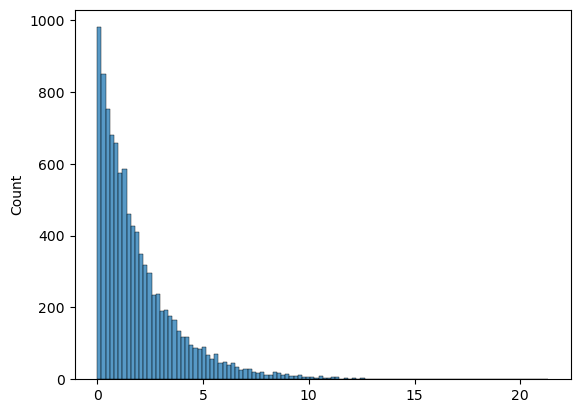

In [8]:

sns.histplot(X)

Normal Scaler

<Axes: xlabel='scaled', ylabel='Count'>

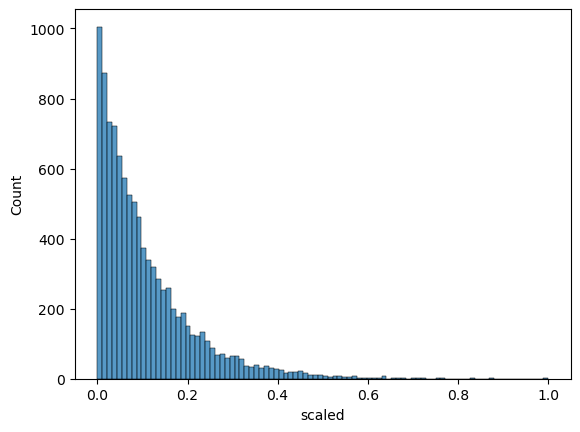

In [5]:
def normalize(data):
    x_min=min(data)
    x_max=max(data)
    x_normal=[]
    for i in range(0,len(data)-1):
        x=data[i]
        x=(x-x_min)/(x_max-x_min)
        x_normal.append(x)
    sns.histplot(x_normal)
#normalize(X)  
    
scaler=MinMaxScaler()
normalized_data=scaler.fit_transform(df)
normalized_dataframe=pd.DataFrame(normalized_data,columns=["scaled"])
normalized_dataframe.insert(0,"unscaled",X)
sns.histplot(normalized_dataframe['scaled']) 
  

Standard Scaler

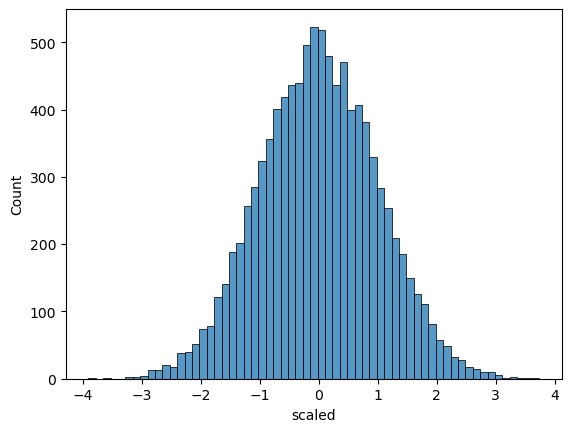

In [33]:
def standardize(data):
    mean=np.mean(data)
    std_dev=np.std(data)
    x_standard=[]
    
    for i in range(0,len(data)-1):
        x=data[i]
        x=(x-mean)/std_dev
        x_standard.append(x)
    sns.histplot(x_standard)
    
X=np.random.normal(10,5,10000)
data={'unscaled':X}
df1=pd.DataFrame(data)

#standardize(X)

scaler=StandardScaler()
standardized_data=scaler.fit_transform(df1)
standardized_dataframe=pd.DataFrame(standardized_data,columns=["scaled"])
standardized_dataframe.insert(0,"unscaled",X)

   
k=scaler.inverse_transform(standardized_data) 
inversed=pd.DataFrame(k,columns=['inversed'])
inversed.insert(0,"Scaled",standardized_data)

sns.histplot(standardized_dataframe['scaled'])

Robust Scaler

<Axes: xlabel='scaled', ylabel='Count'>

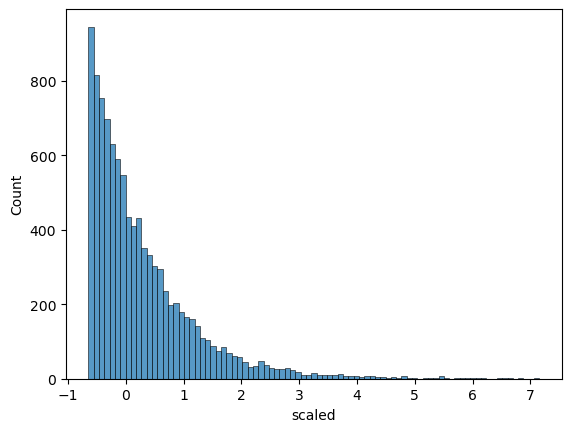

In [71]:
def robust(data):
    median=np.median(data)
    n=len(data)
    q1=data[int(((n)*0.25))-1]    #q1=df[data].quantile(0.25)
    q3=data[int(((n)*0.75))-1]
    iqr=q3-q1
    scaled_data=[]
    for i in range(0,n-1):
        x=data[i]
        x=(x-median)/iqr
        scaled_data.append(x)
    sns.histplot(scaled_data)
#robust(X)

scaler=RobustScaler()
scaled_data=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_data,columns=["scaled"])
scaled_df.insert(0,"unscaled",X)
sns.histplot(scaled_df['scaled'])
  